# stage

Stage允许您在多个阶段计算映射。

您可以计算数据帧中变量的表达式，然后再计算修改映射到比例的值的表达式。

In [2]:
import pandas as pd
import numpy as np

from plotnine import (
    ggplot,
    aes,
    after_stat,
    stage,
    geom_bar,
    geom_text,
    geom_bin_2d,
    stat_bin_2d,
)

In [3]:
df = pd.DataFrame({
    "var1": list("abbcccddddeeeee"),
    "cat": list("RSRSRSRRRSRSSRS")
})



-    PANEL  count  group  prop  width    x  y
0      1      1      1   1.0    0.9  1.0  1
1      1      2      2   1.0    0.9  2.0  2
2      1      3      3   1.0    0.9  3.0  3
3      1      4      4   1.0    0.9  4.0  4
4      1      5      5   1.0    0.9  5.0  5


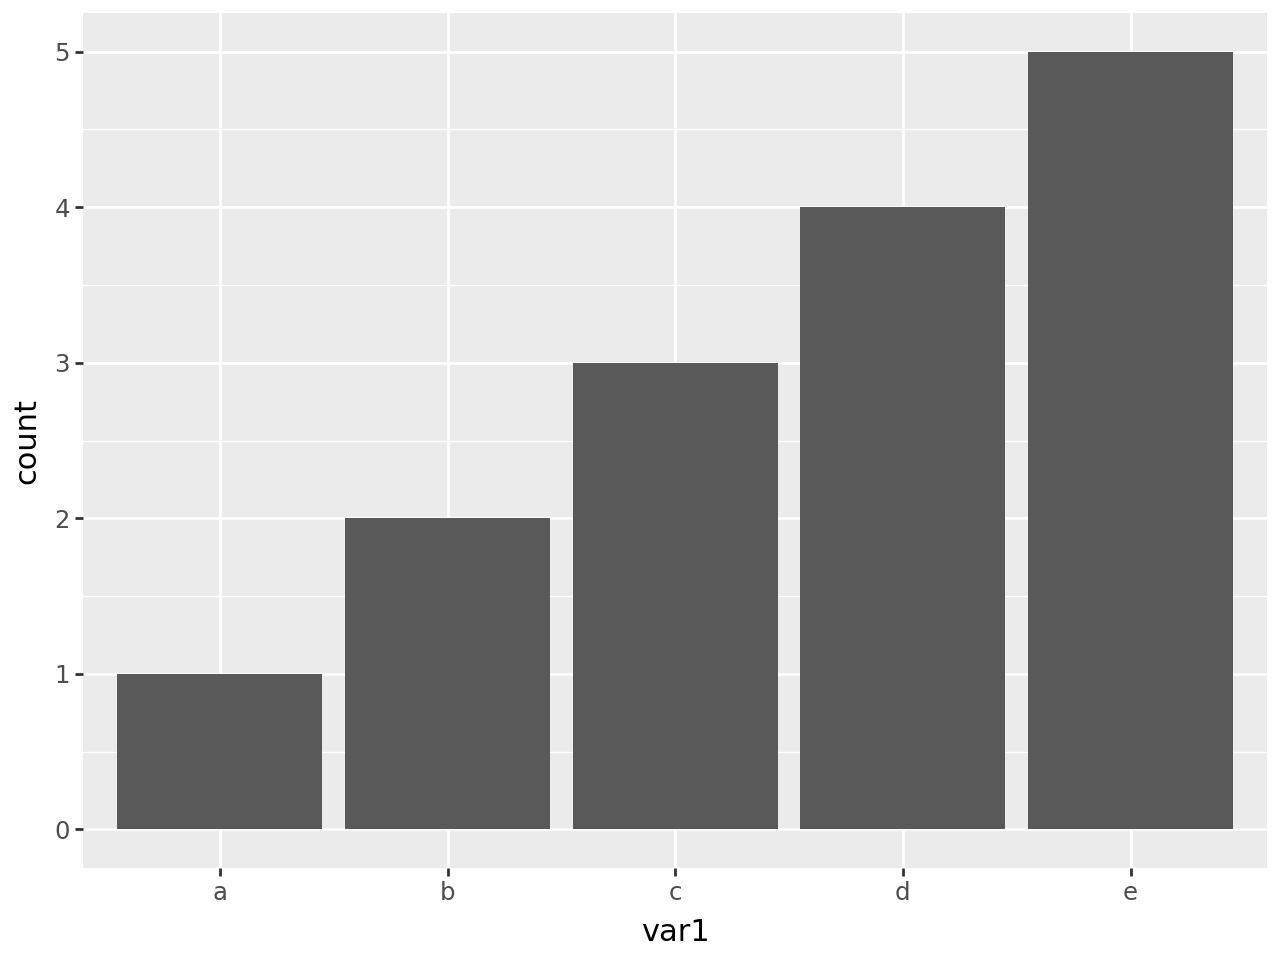

In [4]:
(
    ggplot(df, aes("var1"))
    + geom_bar()
)

在每个条的顶部添加相应的计数。

In [5]:
aes(label=after_stat("count"))

{'label': after_stat('count')}

In [6]:
geom_text(aes(label=after_stat("count")), stat="count")

-    PANEL  count  group  prop  width    x  y
0      1      1      1   1.0    0.9  1.0  1
1      1      2      2   1.0    0.9  2.0  2
2      1      3      3   1.0    0.9  3.0  3
3      1      4      4   1.0    0.9  4.0  4
4      1      5      5   1.0    0.9  5.0  5
-    PANEL  count  group  prop  width    x  label  y
0      1      1      1   1.0    0.9  1.0      1  1
1      1      2      2   1.0    0.9  2.0      2  2
2      1      3      3   1.0    0.9  3.0      3  3
3      1      4      4   1.0    0.9  4.0      4  4
4      1      5      5   1.0    0.9  5.0      5  5


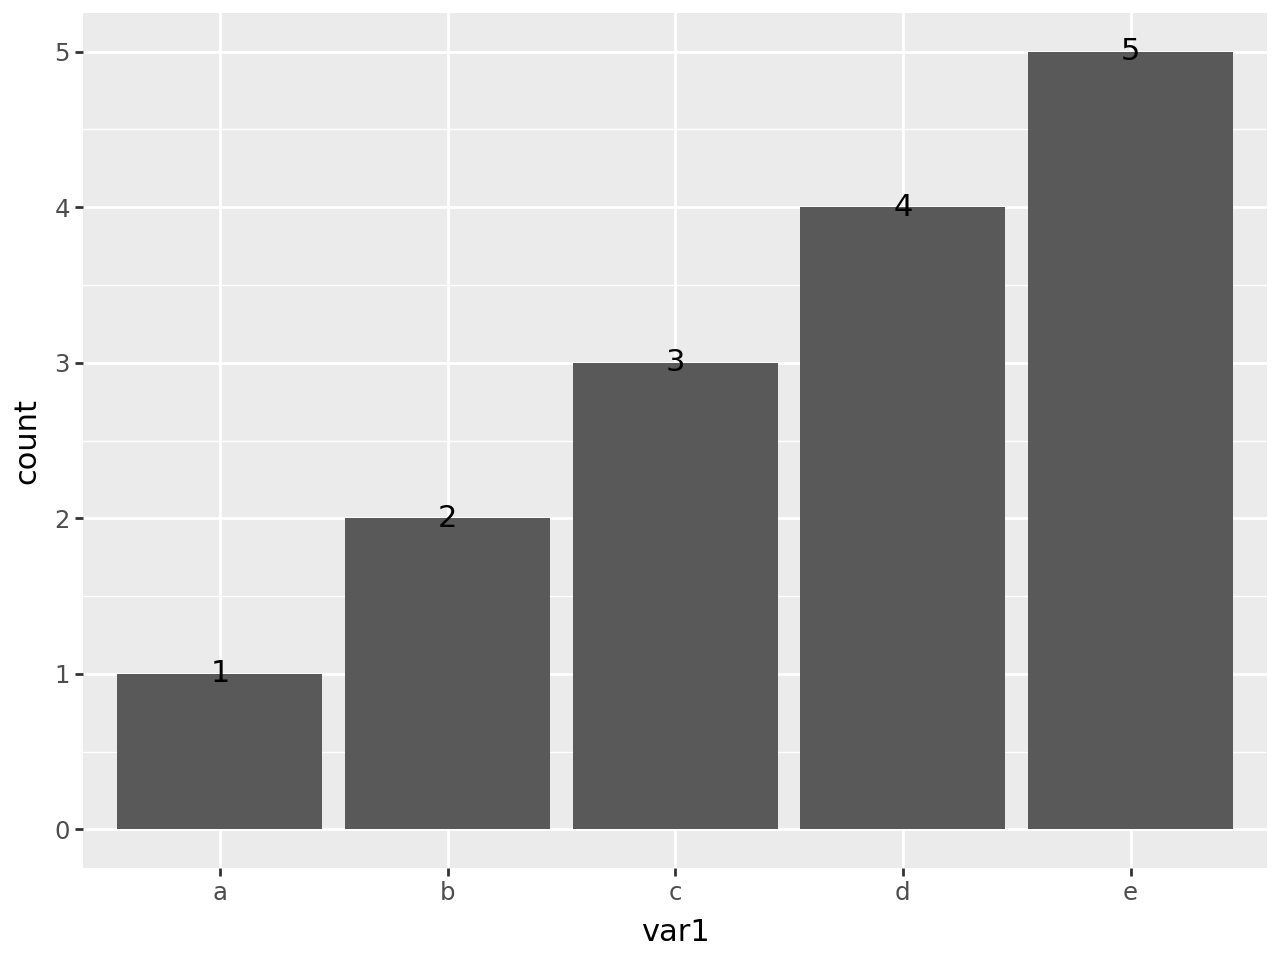

In [7]:
(
    ggplot(df, aes("var1"))
    + geom_bar()
    + geom_text(aes(label=after_stat("count")), stat="count")
)

In [8]:
stage(after_stat="count", after_scale="y+0.1")

stage(start=None, after_stat='count', after_scale='y+0.1')

-    PANEL  count  group  prop  width    x  y
0      1      1      1   1.0    0.9  1.0  1
1      1      2      2   1.0    0.9  2.0  2
2      1      3      3   1.0    0.9  3.0  3
3      1      4      4   1.0    0.9  4.0  4
4      1      5      5   1.0    0.9  5.0  5
-    PANEL  count  group  prop  width    x  label  y
0      1      1      1   1.0    0.9  1.0      1  1
1      1      2      2   1.0    0.9  2.0      2  2
2      1      3      3   1.0    0.9  3.0      3  3
3      1      4      4   1.0    0.9  4.0      4  4
4      1      5      5   1.0    0.9  5.0      5  5


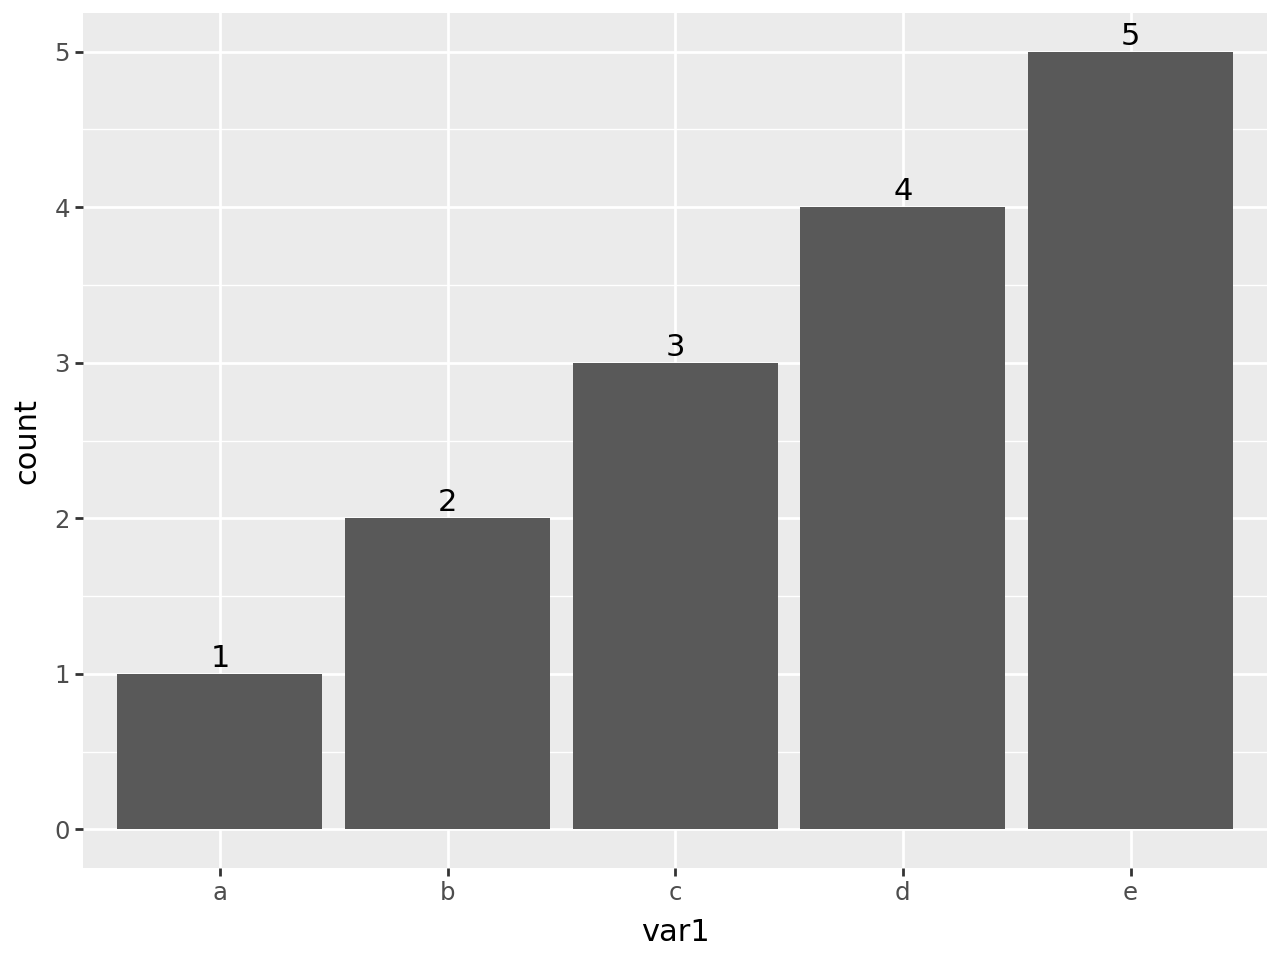

In [9]:
(
    ggplot(df, aes("var1"))
    + geom_bar()
    + geom_text(
        aes(label=after_stat("count"), 
            y=stage(after_stat="count", after_scale="y+0.1")),
        stat="count",
    )
)



请注意，这甚至可以很好地用于堆叠的条形图，而在这些条形图中，使用`nudge_y=0.1`调整位置是行不通的。

-    PANEL  count fill  group  prop  width    x  y
0      1      1    R      1   1.0    0.9  1.0  1
1      1      1    R      2   1.0    0.9  2.0  1
2      1      1    R      3   1.0    0.9  3.0  1
3      1      3    R      4   1.0    0.9  4.0  3
4      1      2    R      5   1.0    0.9  5.0  2
5      1      1    S      6   1.0    0.9  2.0  1
6      1      2    S      7   1.0    0.9  3.0  2
7      1      1    S      8   1.0    0.9  4.0  1
8      1      3    S      9   1.0    0.9  5.0  3
-    PANEL  count fill  group  prop  width    x  label  y
0      1      1    R      1   1.0    0.9  1.0      1  1
1      1      1    R      2   1.0    0.9  2.0      1  1
2      1      1    R      3   1.0    0.9  3.0      1  1
3      1      3    R      4   1.0    0.9  4.0      3  3
4      1      2    R      5   1.0    0.9  5.0      2  2
5      1      1    S      6   1.0    0.9  2.0      1  1
6      1      2    S      7   1.0    0.9  3.0      2  2
7      1      1    S      8   1.0    0.9  4.0      1  1
8 

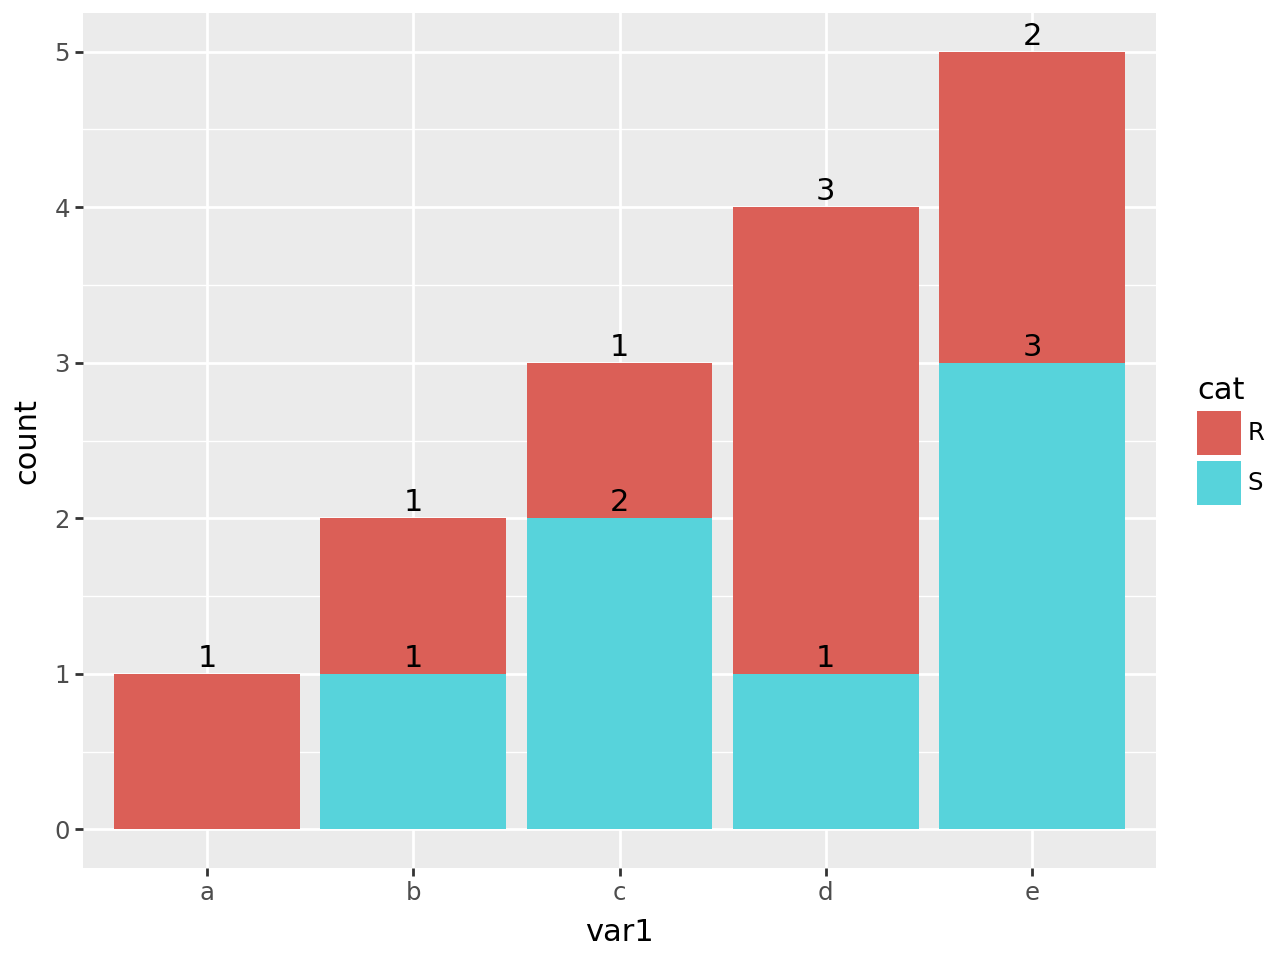

In [10]:
(
    ggplot(df, aes("var1", fill="cat"))
    + geom_bar()
    + geom_text(
        aes(label=after_stat("count"), y=stage(after_stat="count", after_scale="y+.1")),
        stat="count",
        position="stack",
    )
)

创建一个带有计数的分箱2d图



In [11]:
np.random.seed(123)
df = pd.DataFrame({
    "col_1": np.random.rand(1000),
    "col_2": np.random.rand(1000)
})

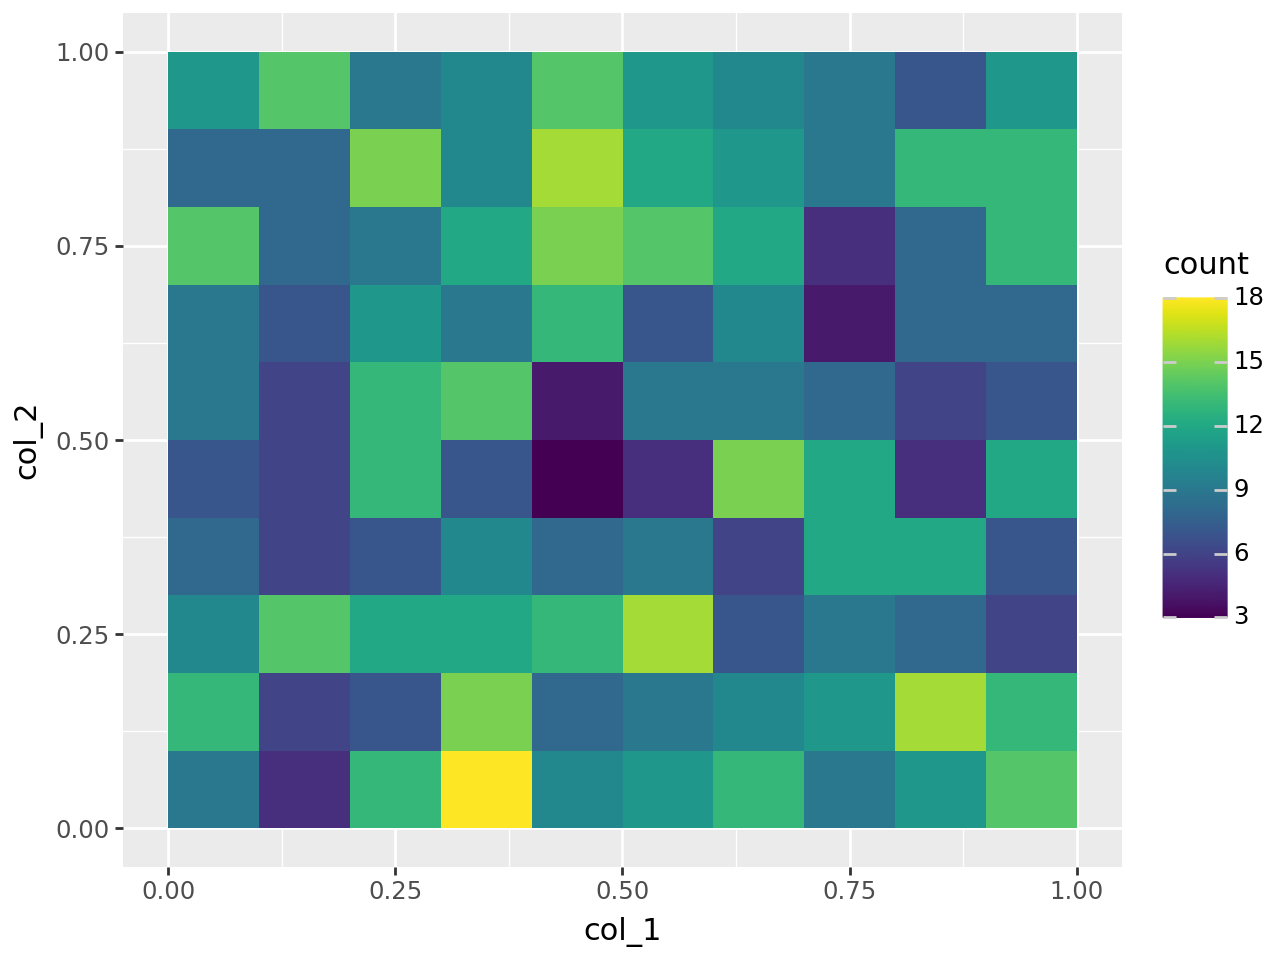

In [12]:
(
    ggplot(df, aes(x="col_1", y="col_2"))
    + geom_bin_2d(position="identity", binwidth=0.1)
)

将计数添加到箱子中。`Stat_bin_2d_bin`使用尺寸的矩形最小和最大端点指定;我们使用这些值来计算放置计数的中点。

首先将`x`和`y`美学映射到`col_1`和`col_2`变量，然后在统计数据使用它们并为每个`bin`创建`xmin`、`xmax`、`ymin`和`ymax`值以及相关计数之后。在统计计算之后，`x`和`y`美学不存在，但我们使用最小和最大端点创建有意义的值。

注意，`geom`和`stat`组合的初始化参数必须相同。在本例中，它是`binwidth`。

-     PANEL  count  density  group  xmax  xmin  ymax  ymin     x     y  label  \
0       1    9.0    0.009     -1   0.1   0.0   0.1   0.0  0.05  0.05    9.0   
1       1    5.0    0.005     -1   0.2   0.1   0.1   0.0  0.15  0.05    5.0   
2       1   13.0    0.013     -1   0.3   0.2   0.1   0.0  0.25  0.05   13.0   
3       1   18.0    0.018     -1   0.4   0.3   0.1   0.0  0.35  0.05   18.0   
4       1   10.0    0.010     -1   0.5   0.4   0.1   0.0  0.45  0.05   10.0   
..    ...    ...      ...    ...   ...   ...   ...   ...   ...   ...    ...   
95      1   11.0    0.011     -1   0.6   0.5   1.0   0.9  0.55  0.95   11.0   
96      1   10.0    0.010     -1   0.7   0.6   1.0   0.9  0.65  0.95   10.0   
97      1    9.0    0.009     -1   0.8   0.7   1.0   0.9  0.75  0.95    9.0   
98      1    7.0    0.007     -1   0.9   0.8   1.0   0.9  0.85  0.95    7.0   
99      1   11.0    0.011     -1   1.0   0.9   1.0   0.9  0.95  0.95   11.0   

    fill  
0    9.0  
1    5.0  
2   13.0  
3   1

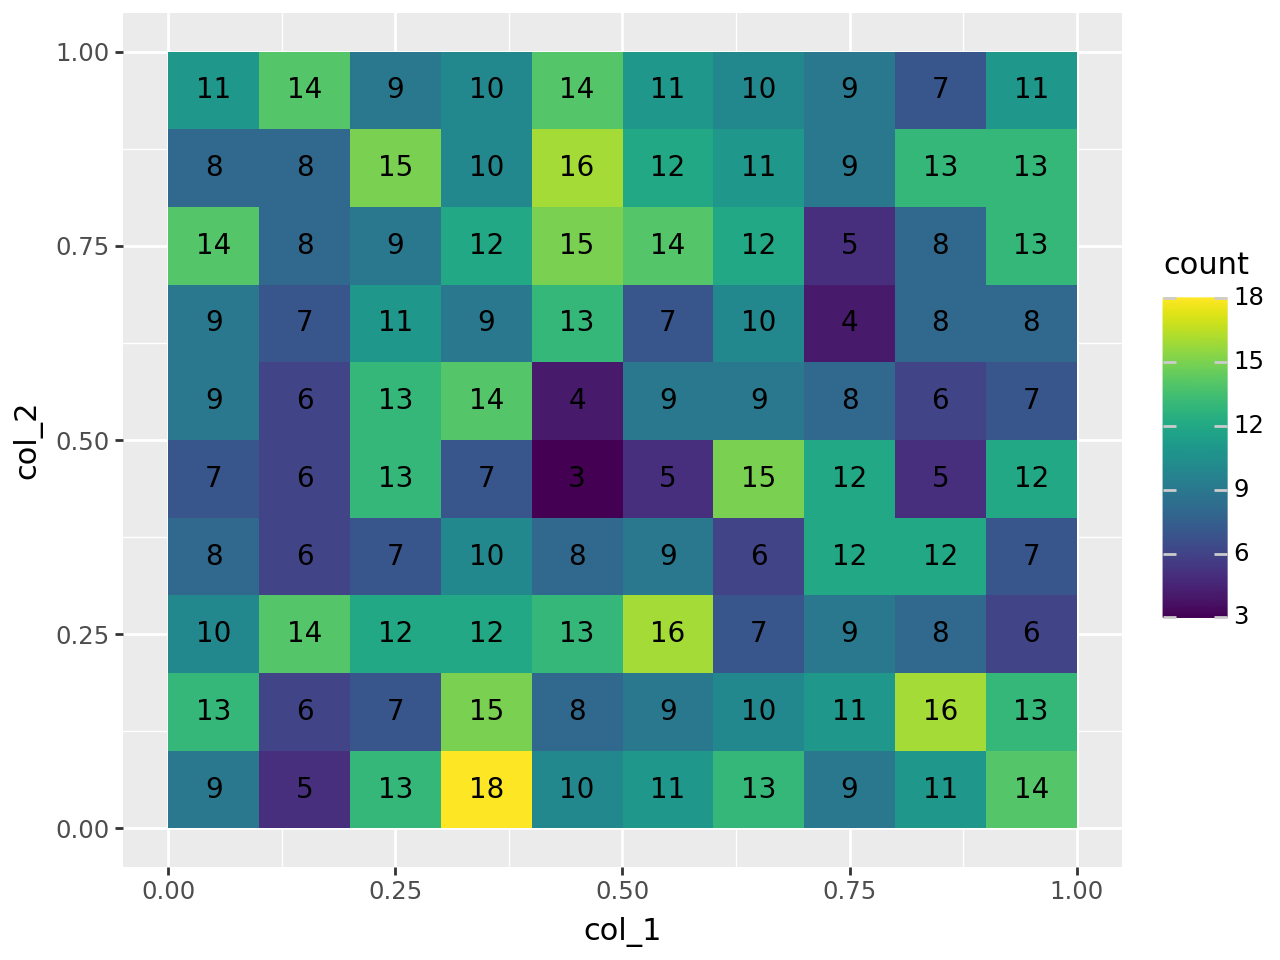

In [13]:
(
    ggplot(df, aes(x="col_1", y="col_2"))
    + geom_bin_2d(position="identity", binwidth=0.1)
    + stat_bin_2d(
        aes(
            x=stage(start="col_1", after_stat="(xmin+xmax)/2"),
            y=stage(start="col_2", after_stat="(ymin+ymax)/2"),
            label=after_stat("count"),
        ),
        binwidth=0.1,
        geom="text",
        format_string="{:.0f}",
        size=10,
    )
)